# Практика

In [1]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Создание БД

In [2]:
connection = sqlite3.connect("works.sqlite")
cursor = connection.cursor()
cursor.execute("DROP TABLE IF EXISTS works")
cursor.execute("CREATE TABLE works ("
                   "ID INTEGER PRIMARY KEY AUTOINCREMENT,"
                   "salary INTEGER,"
                   "educationType TEXT,"
                   "jobTitle TEXT,"
                   "qualification TEXT,"
                   "gender TEXT,"
                   "dateModify TEXT,"
                   "skills TEXT,"
                   "otherInfo TEXT"
               ")")
connection.commit()

In [3]:
cursor.execute("pragma table_info(works)").fetchall()

[(0, 'ID', 'INTEGER', 0, None, 1),
 (1, 'salary', 'INTEGER', 0, None, 0),
 (2, 'educationType', 'TEXT', 0, None, 0),
 (3, 'jobTitle', 'TEXT', 0, None, 0),
 (4, 'qualification', 'TEXT', 0, None, 0),
 (5, 'gender', 'TEXT', 0, None, 0),
 (6, 'dateModify', 'TEXT', 0, None, 0),
 (7, 'skills', 'TEXT', 0, None, 0),
 (8, 'otherInfo', 'TEXT', 0, None, 0)]

In [4]:
df = pd.read_csv("works.csv")
df.to_sql("works", connection, if_exists="append", index=False)
connection.commit()

In [5]:
cursor.execute("SELECT * FROM works LIMIT 5").fetchall()

[(1,
  60000,
  'Высшее',
  'Специалист пресс-службы',
  'Магистр',
  'Мужской',
  '2021-04-01',
  '<p>Аналитическое&nbsp;мышление,&nbsp;<span class="s6"><span class="bumpedFont15">ответственность, </span></span><span class="s6"><span class="bumpedFont15">стабильность психологического состояния и настроения.&nbsp;</span></span></p>',
  None),
 (2,
  85000,
  'Высшее',
  'менеджер проектов',
  None,
  'Мужской',
  '2021-04-01',
  None,
  None),
 (3,
  15000,
  'Среднее профессиональное',
  '....',
  None,
  'Женский',
  '2021-06-01',
  None,
  None),
 (4, 30000, None, None, None, 'Женский', '2021-04-03', None, None),
 (5, 45000, None, None, None, 'Мужской', '2021-06-28', None, None)]

### 2. Создание индекса

In [6]:
import os.path

In [7]:
print(os.path.getsize("works.sqlite") / 1024 / 1024, "Mб")

6.52734375 Mб


In [8]:
cursor.execute("CREATE INDEX salary_works_ind ON works(salary)")
connection.commit()

In [9]:
print(os.path.getsize("works.sqlite") / 1024 / 1024, "Mб")

6.52734375 Mб


### 3. Запросы к БД

Вывод количества всех записей в БД

In [10]:
cursor.execute("SELECT COUNT(*) FROM works").fetchall()

[(32683,)]

Вывод количества мужчин

In [11]:
cursor.execute("SELECT COUNT(*) FROM works WHERE gender = 'Мужской'").fetchall()

[(13386,)]

Вывод количества женщин

In [12]:
cursor.execute("SELECT COUNT(*) FROM works WHERE gender = 'Женский'").fetchall()

[(17910,)]

Вывод количества мужчин и женщин

In [13]:
cursor.execute("SELECT gender, COUNT(*) FROM works GROUP BY gender").fetchall()

[(None, 1387), ('Женский', 17910), ('Мужской', 13386)]

Вывод количества заполеных skills

In [14]:
cursor.execute("SELECT COUNT(*) FROM works WHERE skills NOT NULL").fetchall()

[(8972,)]

Вывод заполеных skills

In [15]:
cursor.execute("SELECT skills FROM works WHERE skills NOT NULL").fetchall()

[('<p>Аналитическое&nbsp;мышление,&nbsp;<span class="s6"><span class="bumpedFont15">ответственность, </span></span><span class="s6"><span class="bumpedFont15">стабильность психологического состояния и настроения.&nbsp;</span></span></p>',),
 ('Ответственная,пунктуальная,дисциплинированная я,стрессоустойчивая,легкообучаема ,технически оснащена',),
 ('<p>Коммуникабельность&nbsp;</p>',),
 ('<p>Ответственность в работе</p>',),
 ('<p>Усидчивость, умение удерживать в памяти нужную информацию,скрупулезность, пунктуальность, умение планировать и организовать рабочий процесс,дальновидность, умение собирать и анализировать данные, аккуратность, нацеленность на результат.</p>',),
 ('<p>Владение&nbsp;ПК:&nbsp;MsOffice,&nbsp;1С:ЗУП&nbsp;8.3,&nbsp;&laquo;Консультант+&raquo;</p><p>Знание&nbsp;ТК&nbsp;РФ,&nbsp;делового&nbsp;этикета.</p><p>Опыт&nbsp;работы&nbsp;в&nbsp;условиях&nbsp;многозадачности.</p><p>Опыт&nbsp;консультирования&nbsp;клиентов.&nbsp;</p><p>Консультирование&nbsp;сотрудников&nbsp;по&nbs

Вывод зарплаты только у тех, у кого в скилах есть Python

In [16]:
cursor.execute("SELECT ID, salary FROM works WHERE skills LIKE '%Python%'").fetchall()

[(231, 35000),
 (335, 20000),
 (2395, 35000),
 (8097, 15000),
 (9015, 25000),
 (9668, 90000),
 (20931, 30000),
 (22531, 50000),
 (28287, 23000),
 (30431, 23000)]

Построить перцентили и разброс по з/п у мужчин и женщин

In [17]:
percentiles = np.linspace(.1, 1, 10)
percentiles

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [18]:
men_salary = [row[0] for row in cursor.execute("SELECT salary FROM works WHERE gender = 'Мужской'").fetchall()]
men_salary = np.quantile(men_salary, percentiles)
list(zip(percentiles, men_salary))

[(0.1, 15000.0),
 (0.2, 20000.0),
 (0.30000000000000004, 25000.0),
 (0.4, 30000.0),
 (0.5, 30000.0),
 (0.6, 35000.0),
 (0.7000000000000001, 40000.0),
 (0.8, 50000.0),
 (0.9, 60000.0),
 (1.0, 1000000.0)]

In [19]:
women_salary = [row[0] for row in cursor.execute("SELECT salary FROM works WHERE gender = 'Женский'").fetchall()]
women_salary = np.quantile(women_salary, percentiles)
list(zip(percentiles, women_salary))

[(0.1, 15000.0),
 (0.2, 18000.0),
 (0.30000000000000004, 20000.0),
 (0.4, 22000.0),
 (0.5, 25000.0),
 (0.6, 30000.0),
 (0.7000000000000001, 30000.0),
 (0.8, 35000.0),
 (0.9, 47000.0),
 (1.0, 900000.0)]

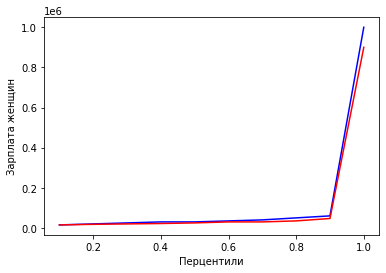

In [20]:
plt.plot(percentiles, men_salary, color="b")
plt.plot(percentiles, women_salary, color="r")
plt.xlabel("Перцентили")
plt.ylabel("Зарплата женщин")

plt.show()

Построить графики распределения по з/п мужчин и женщин (а также в зависимости от высшего образования).

In [21]:
men_salary = cursor.execute("SELECT educationType, AVG(salary) FROM works WHERE gender = 'Мужской' GROUP BY educationType")\
                    .fetchall()
men_salary

[(None, 33991.13916327716),
 ('Высшее', 48551.77576736672),
 ('Незаконченное высшее', 47691.925287356324),
 ('Среднее', 32519.767707284325),
 ('Среднее профессиональное', 35329.004542873365)]

In [22]:
women_salary = cursor.execute("SELECT educationType, AVG(salary) FROM works WHERE gender = 'Женский' GROUP BY educationType")\
                    .fetchall()
women_salary

[(None, 26464.75166923472),
 ('Высшее', 33826.00800934424),
 ('Незаконченное высшее', 29171.38264299803),
 ('Среднее', 24958.723963279517),
 ('Среднее профессиональное', 25834.460408537983)]

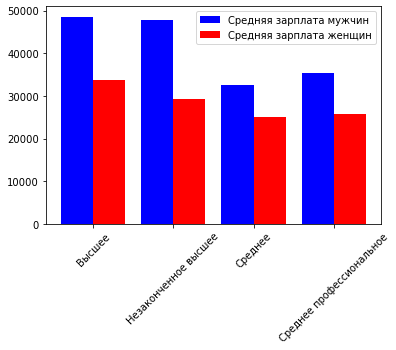

In [23]:
educationTypes = [row[0] for row in men_salary[1:]]
men_salaries = [row[1] for row in men_salary[1:]]
women_salaries = [row[1] for row in women_salary[1:]]

index = np.arange(len(educationTypes))

bw = 0.4
plt.bar(index-bw/2, men_salaries, bw, color="b", label="Средняя зарплата мужчин")
plt.bar(index+bw/2, women_salaries, bw, color="r", label="Средняя зарплата женщин")
plt.xticks(index, educationTypes,rotation=45)
plt.legend()
plt.show()

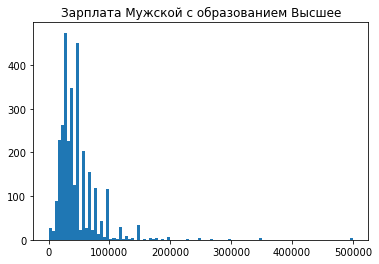

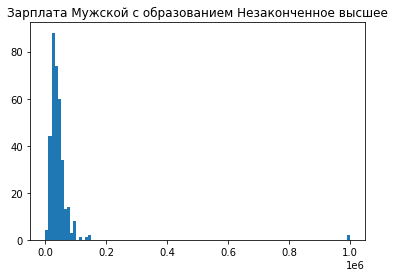

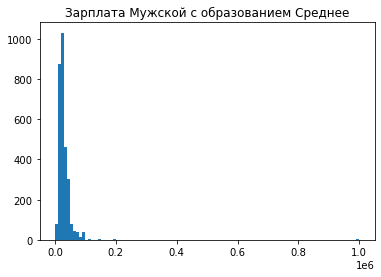

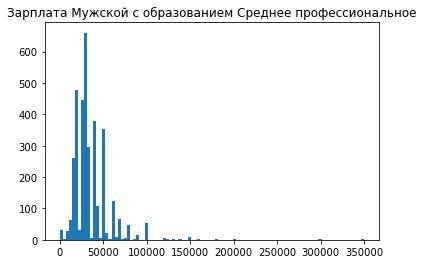

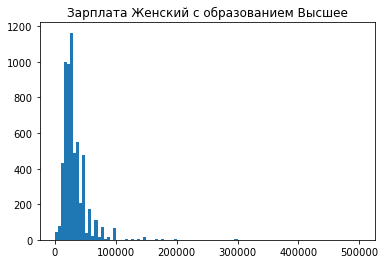

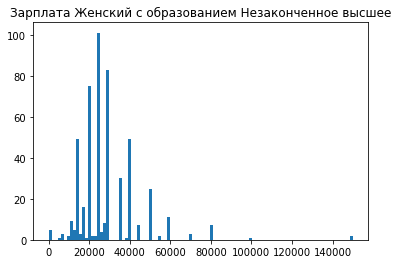

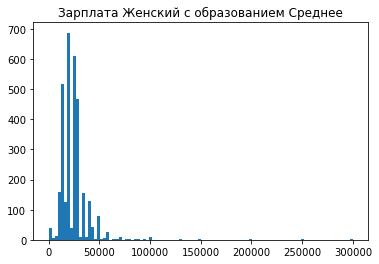

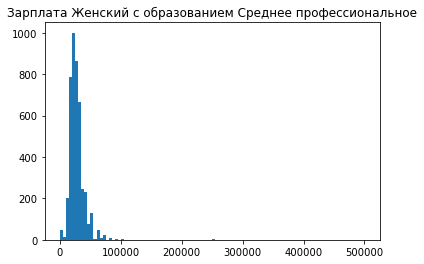

In [24]:
params = [("Мужской", "Высшее"), ("Мужской", "Незаконченное высшее"), ("Мужской", "Среднее"),
          ("Мужской", "Среднее профессиональное"), ("Женский", "Высшее"), ("Женский", "Незаконченное высшее"), 
          ("Женский", "Среднее"), ("Женский", "Среднее профессиональное")]
for p in params:
    sql_query = f"SELECT salary FROM works WHERE gender = '{p[0]}' and educationType = '{p[1]}'"
    salary = [row[0] for row in cursor.execute(sql_query).fetchall()]
    plt.hist(salary, bins=100)
    plt.title(f"Зарплата {p[0]} с образованием {p[1]}")
    plt.show()